In [1]:
# Deep Learning Spam Assasing Project
# Bayes algorithm
# Goal: Implement Bayes base on prepared data



In [2]:
# Activity plan:
# Step I : Data collection and data pre processing.
#     * Gather data
#     * Clean data
#     * Lebel the data
#
# Step II : Model selection.
#     * Choose model(RNN, CNN, LSTM)
#     * Model implementation
#
# Step III : Model implementation
#     * Design model
#     * Split data into training/test sets
#     * Train model
#
# Step IV : Model quality evaluation
#     * Setup quality tools
#     * Perform tests to evaluate performance
#
# Step V : Project documentation
#     * Add comments to code



In [3]:
# import packages
import pandas as pd # manipulating the data purpose
import csv
import os
import numpy as np
from sklearn.model_selection import train_test_split # Split test/train data randomly
from sklearn.feature_extraction.text import CountVectorizer # Convert a collection of text documents to a matrix of token counts
from sklearn.naive_bayes import MultinomialNB # add classifier for classification of words
import re

In [4]:
# Step I : Data collection and data pre processing.
#     * Gather data



In [5]:
# Define input directory containing the files and output CSV file path
input_directory_non_spam = 'C:/VirtualServer/src_spam_assasin/srcdata/easy_ham'
input_directory_spam = 'C:/VirtualServer/src_spam_assasin/srcdata/spam'
output_csv_non_spam = 'output_emails_non_spam.csv'
output_csv_spam = 'output_emails_spam.csv'

In [6]:
def load_emails_data(input_directory):
    '''
    Load all emails from given directory

    Paramater:
    input_directory : Folder with data

    Returns
    List of emails dataset
    '''
    
    # List to hold all rows of data
    emails_dataset = []

    # Iterate over all files in the input directory
    for filename in os.listdir(input_directory):
        file_path = os.path.join(input_directory, filename)
        # Only process if it's a file
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                file_content = file.read().strip()
                # Replace newlines with spaces to have one constant text
                file_content_single_line = file_content.replace('\n', ' ')
                file_content_no_sign = file_content_single_line.replace(',', ' ')
                emails_dataset.append(file_content_no_sign)
    return emails_dataset

In [7]:
# Load ONLY ham emails
emails_dataset_raw_ham =  load_emails_data(input_directory_non_spam)

counter = 0
for element in emails_dataset_raw_ham:
    if counter < 3:
        print("********************************************************")
        print(f"{element}")
        print("********************************************************")
    else:
        break;
    counter = counter +1

********************************************************
From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002 Return-Path: <exmh-workers-admin@example.com> Delivered-To: zzzz@localhost.netnoteinc.com Received: from localhost (localhost [127.0.0.1]) 	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36 	for <zzzz@localhost>; Thu  22 Aug 2002 07:36:16 -0400 (EDT) Received: from phobos [127.0.0.1] 	by localhost with IMAP (fetchmail-5.9.0) 	for zzzz@localhost (single-drop); Thu  22 Aug 2002 12:36:16 +0100 (IST) Received: from listman.example.com (listman.example.com [66.187.233.211]) by     dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for     <zzzz-exmh@example.com>; Thu  22 Aug 2002 12:34:53 +0100 Received: from listman.example.com (localhost.localdomain [127.0.0.1]) by     listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu  22 Aug 2002     07:35:02 -0400 (EDT) Delivered-To: exmh-workers@listman.example.com Received: from int-mx1.corp.example.

In [8]:
# Load ONLY spam emails
emails_dataset_raw_spam =  load_emails_data(input_directory_spam)

counter = 0
for element in emails_dataset_raw_ham:
    if counter < 3:
        print("********************************************************")
        print(f"{element}")
        print("********************************************************")
    else:
        break;
    counter = counter +1

********************************************************
From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002 Return-Path: <exmh-workers-admin@example.com> Delivered-To: zzzz@localhost.netnoteinc.com Received: from localhost (localhost [127.0.0.1]) 	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36 	for <zzzz@localhost>; Thu  22 Aug 2002 07:36:16 -0400 (EDT) Received: from phobos [127.0.0.1] 	by localhost with IMAP (fetchmail-5.9.0) 	for zzzz@localhost (single-drop); Thu  22 Aug 2002 12:36:16 +0100 (IST) Received: from listman.example.com (listman.example.com [66.187.233.211]) by     dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for     <zzzz-exmh@example.com>; Thu  22 Aug 2002 12:34:53 +0100 Received: from listman.example.com (localhost.localdomain [127.0.0.1]) by     listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu  22 Aug 2002     07:35:02 -0400 (EDT) Delivered-To: exmh-workers@listman.example.com Received: from int-mx1.corp.example.

In [9]:
# Data are loaded and divided to HAM and SPAM
# SPAM : emails_dataset_raw_spam 
# HAM : emails_dataset_raw_ham



In [10]:
# Step I : Data collection and data pre processing.
#     * Clean data



In [11]:
# extracting pure email body - cleaning the data
def extract_pure_email(raw_emails):
    key_word = 'Date:'
    cleaned_email = []
    for email in raw_emails:
        # Find the line with "Subject:" and extract everything from that line onward
        subject_start = re.search(key_word, email, re.MULTILINE)
        if subject_start:
            extracted_content = email[subject_start.start():]
            cleaned_email.append(extracted_content)
    return cleaned_email

In [12]:
cleaned_ham_dataset = extract_pure_email(emails_dataset_raw_ham)

counter = 0
for element in cleaned_ham_dataset:
    if counter < 3:
        print("********************************************************")
        print(f"{element}")
        print("********************************************************")
    else:
        break;
    counter = counter +1

********************************************************
Date: Thu  22 Aug 2002 18:26:25 +0700      Date:        Wed  21 Aug 2002 10:54:46 -0500     From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>     Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>     | I can't reproduce this error.  For me it is very repeatable... (like every time  without fail).  This is the debug log of the pick happening ...  18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury} 18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury 18:19:04 Ftoc_PickMsgs {{1 hit}} 18:19:04 Marking 1 hits 18:19:04 tkerror: syntax error in expression "int ...  Note  if I run the pick command by hand ...  delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury 1 hit  That's where the "1 hit" comes from (obviously).  The version of nmh I'm using is 

In [13]:
cleaned_spam_dataset = extract_pure_email(emails_dataset_raw_spam)

counter = 0
for element in cleaned_ham_dataset:
    if counter < 3:
        print("********************************************************")
        print(f"{element}")
        print("********************************************************")
    else:
        break;
    counter = counter +1

********************************************************
Date: Thu  22 Aug 2002 18:26:25 +0700      Date:        Wed  21 Aug 2002 10:54:46 -0500     From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>     Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>     | I can't reproduce this error.  For me it is very repeatable... (like every time  without fail).  This is the debug log of the pick happening ...  18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury} 18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury 18:19:04 Ftoc_PickMsgs {{1 hit}} 18:19:04 Marking 1 hits 18:19:04 tkerror: syntax error in expression "int ...  Note  if I run the pick command by hand ...  delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury 1 hit  That's where the "1 hit" comes from (obviously).  The version of nmh I'm using is 

In [14]:
# checking dataset - how many raws in each HAM / SPAM dataset.
spam_emails_quantity = len(cleaned_spam_dataset)
ham_emails_quantity = len(cleaned_ham_dataset)
print(f"Spam dataset emails quantity: {spam_emails_quantity}")
print(f"Spam dataset emails quantity: {ham_emails_quantity}")


Spam dataset emails quantity: 500
Spam dataset emails quantity: 2551


In [15]:
# Data are cleaned and divided to HAM and SPAM
# SPAM : cleaned_spam_dataset
# HAM : cleaned_ham_dataset




In [16]:
# Step I : Data collection and data pre processing.
#     * Lebel the data



In [17]:
# Labeling the data
def label_dataset(dataset, label):
    labeled_dataset = []
    
    for email in dataset:
        labeled_dataset.append([email, label])
    return labeled_dataset

In [18]:
spam_dataset = label_dataset(cleaned_spam_dataset, 1)
ham_dataset = label_dataset(cleaned_ham_dataset, 0)

In [19]:
# checking dataset - how many raws in each HAM / SPAM dataset.
spam_emails_quantity = len(spam_dataset)
ham_emails_quantity = len(ham_dataset)
print(f"Spam dataset emails quantity: {spam_emails_quantity}")
print(f"Spam dataset emails quantity: {ham_emails_quantity}")

Spam dataset emails quantity: 500
Spam dataset emails quantity: 2551


In [20]:
counter = 0
for element in spam_dataset:
    if counter < 3:
        print("********************************************************")
        print(f"{element}")
        print("********************************************************")
    else:
        break;
    counter = counter +1

********************************************************
['Date: Wed  21 Aug 2002 20:31:57 -1600 MIME-Version: 1.0 Message-ID: <0103c1042001882DD_IT7@dd_it7> Content-Type: text/html; charset="iso-8859-1" Content-Transfer-Encoding: quoted-printable  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"> <HTML><HEAD> <META content=3D"text/html; charset=3Dwindows-1252" http-equiv=3DContent-T= ype> <META content=3D"MSHTML 5.00.2314.1000" name=3DGENERATOR></HEAD> <BODY><!-- Inserted by Calypso --> <TABLE border=3D0 cellPadding=3D0 cellSpacing=3D2 id=3D_CalyPrintHeader_ r= ules=3Dnone  style=3D"COLOR: black; DISPLAY: none" width=3D"100%">   <TBODY>   <TR>     <TD colSpan=3D3>       <HR color=3Dblack noShade SIZE=3D1>     </TD></TR></TD></TR>   <TR>     <TD colSpan=3D3>       <HR color=3Dblack noShade SIZE=3D1>     </TD></TR></TBODY></TABLE><!-- End Calypso --><!-- Inserted by Calypso=  --><FONT  color=3D#000000 face=3DVERDANA ARIAL HELVETICA size=3D-2><BR></FONT></TD><= /TR></TABLE><

In [21]:
counter = 0
for element in ham_dataset:
    if counter < 3:
        print("********************************************************")
        print(f"{element}")
        print("********************************************************")
    else:
        break;
    counter = counter +1

********************************************************
['Date: Thu  22 Aug 2002 18:26:25 +0700      Date:        Wed  21 Aug 2002 10:54:46 -0500     From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>     Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>     | I can\'t reproduce this error.  For me it is very repeatable... (like every time  without fail).  This is the debug log of the pick happening ...  18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury} 18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury 18:19:04 Ftoc_PickMsgs {{1 hit}} 18:19:04 Marking 1 hits 18:19:04 tkerror: syntax error in expression "int ...  Note  if I run the pick command by hand ...  delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury 1 hit  That\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m usin

In [38]:
# Data are labeled
# labeled SPAM : spam_dataset
# labeled HAM : ham_dataset




In [61]:
# saving dataset for HAM and SPAM to csv file
import csv

def save_dataset_to_csv(dataset, filename):
    '''
    Save given dataset to csv file

    Parameters:
        dataset : string dataser
        filename : string file name
    '''
    
    with open(filename, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['text', 'label'])  # Write header
        writer.writerows(dataset)


In [62]:
# Saving HAM
save_dataset_to_csv(ham_dataset, 'ham_dataset.csv')
# Saving SPAM
save_dataset_to_csv(spam_dataset, 'spam_dataset.csv')

In [63]:
# load datasets
file_spam = pd.read_csv("spam_dataset.csv")
file_ham = pd.read_csv("ham_dataset.csv")

# merging spam and ham
spam_df = pd.concat([file_spam, file_ham], ignore_index=True) 

<Axes: ylabel='count'>

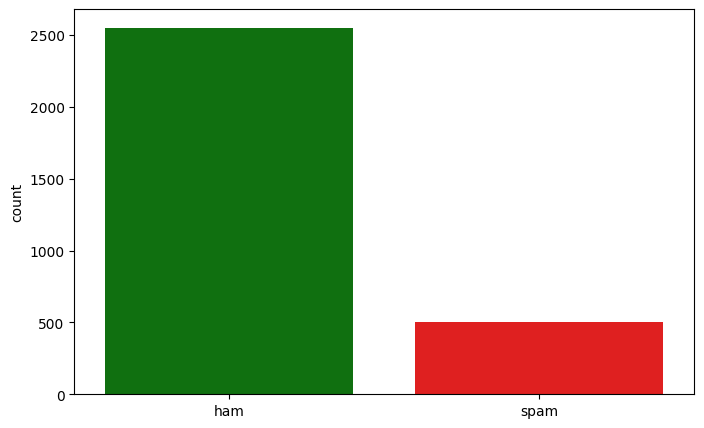

In [64]:
# Show how many spam / ham emails is in given data
import matplotlib.pyplot as plt
import seaborn as sea
labels = ['ham', 'spam']
colors = ['green', 'red']
plt.figure(figsize=(8, 5)) 
data = ['ham'] * len(file_ham) + ['spam'] * len(file_spam) 
sea.countplot(x=data, hue=data, palette=colors, legend=False)

In [65]:
# Check datasets
spam_df.head()

,text,label
0,Date: Wed 21 Aug 2002 20:31:57 -1600 MIME-Ver...,1
1,Date: Thu 22 Aug 2002 06:18:18 -0600 Message-...,1
2,Date: Thu 22 Aug 2002 07:36:19 -0600 Message-...,1
3,Date: Thu 22 Aug 2002 08:13:35 -0700 X-Mailer...,1
4,Date: Thu 22 Aug 2002 09:33:07 -0600 Message-...,1


In [66]:
# Inspect data
spam_df.shape

(3051, 2)

In [48]:
# goup by category. 0 - no spam, 1 - spam
spam_df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
0      2551   2549  Date: Thu  22 Aug 2002 14:55:23 -0700 Date: Th...    2
1       500    486  Date: Sun  25 Aug 2002 21:21:51 -1900 MIME-Ver...    3

In [49]:
# create train/test split w proporcji 25%
x_train, x_test, y_train, y_test = train_test_split(spam_df.text, spam_df.label, test_size = 0.25)

In [50]:
# check training data
x_train.head()

2841    Date: Thu  03 Oct 2002 08:01:20 -0000 Content-...
2953    Date: Mon  07 Oct 2002 08:00:51 -0000 Content-...
2569    Date: Thu  26 Sep 2002 15:31:51 -0000 Content-...
2282    Date: Sat Sep  7 01:06:56 2002 From: tim.one@c...
862     Date: Mon  26 Aug 2002 10:51:29 -0500 (CDT) X-...
Name: text, dtype: object

In [51]:
# check training data
x_train.describe()

count                                                  2288
unique                                                 2278
top       Date: Fri  23 Aug 2002 13:03:04 -0400 Subject:...
freq                                                      3
Name: text, dtype: object

In [52]:
# Check if any nulls are present
x_train.isnull().mean()

0.0

In [53]:
# find key words and store data as matrix of words
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values) # all text transforming to matrix of words

In [54]:
# see matrix shape
x_train_count

<2288x48892 sparse matrix of type '<class 'numpy.int64'>'
	with 379344 stored elements in Compressed Sparse Row format>

In [55]:
x_train_count.toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [2, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [2, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# Model Training

In [56]:
# train model basis on word matrix and given information spam - 1 , not spam - 0
model = MultinomialNB() # word counts for text classification
model.fit(x_train_count, y_train)

MultinomialNB()

In [57]:
# test model accuracy
x_test_count = cv.transform(x_test)
acc = model.score(x_test_count, y_test)
print('Model accuracy score: {0:0.2f} %'.format(acc))

Model accuracy score: 0.97 %


In [58]:
# test trained model on my custom NON SPAM email message
email_ham = ["hey lets have a beer together today. Are you in?"]
email_ham_count = cv.transform(email_ham)
model.predict(email_ham_count)

# Result: array([0], dtype=int64)
# It is NOT spam. SUCCES.

array([0], dtype=int64)

In [59]:
# test trained model on my custom SPAM email message
email_spam = ["reward click now you will be reach"]
email_spam_count = cv.transform(email_spam)
model.predict(email_spam_count)

# Result: array([1], dtype=int64))
# It IS spam. SUCCES.

array([1], dtype=int64)